In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def read_log(fname):
    return pd.read_csv(os.path.expanduser(f'../data/{fname}'))


def savefig(figname):
    plt.savefig(f'../md/images/{figname}')
    
    
def linear(x, y):
    coeffs, cov = np.polyfit(x, y, 1, cov=True)
    m = coeffs[0]
    b = coeffs[1]
    m_std = np.sqrt(cov[0, 0])
    b_std = np.sqrt(cov[1, 1])
    return (m, m_std), (b, b_std)
    

## Verlet Coefficient

In [2]:
df = read_log('terma2.log')

FileNotFoundError: [Errno 2] File b'../data/terma2.log' does not exist: b'../data/terma2.log'

In [ ]:
plt.plot(df.time, df.verlet)
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('Verlet Coefficient')
plt.xlim(0, 10.0)
plt.grid()
# savefig('verlet_vs_t.png')
plt.show()

In [ ]:
plt.plot(df.time, df.E, label='Energía Total')
plt.plot(df.time, df.V, label='Energía Potencial')
plt.plot(df.time, df.K, label='Energía Cinetica')
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('Energia (unidades reducidas)')
plt.legend()
plt.grid()
plt.xlim(-0.05, 2.5)
# savefig('e_vs_t.png')
plt.show()

In [ ]:
plt.plot(df.time, df['T'])
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('Temperatura (unidades reducidas)')
plt.grid()
# savefig('T_vs_t.png')
plt.show()

In [ ]:
plt.plot(df.time, df.H)
plt.xlabel('Tiempo (unidades reducidas)')
plt.ylabel('H')
plt.grid()
# savefig('H_vs_t.png')
plt.show()

## Cv

In [ ]:
_temperatures = np.arange(0, 2, 0.1)

es = []
std_e = []
ts = []
std_t = []
for temperature in _temperatures:
    df = read_log(f'temp_{temperature:.2f}.log')
    es.append(df.E.mean())
    std_e.append(df.E.std())
    ts.append(df["T"].mean())
    std_t.append(df['T'].std())
    
es = np.array(es)
std_e = np.array(std_e)
ts = np.array(ts)
std_t = np.array(std_t)

In [ ]:
std_t

In [ ]:
plt.plot(ts, std_e)

## Rescaling

In [57]:
TEMPERATURES = np.arange(0.4, 2.0, 0.05)
DENSITIES = np.arange(0.4, 0.8, 0.02)
temperatures = []
energies = []
rhos = []
temperatures_std = []
energies_std = []
for temp in TEMPERATURES:
    for rho in DENSITIES:
        df = read_log(f'temp_t_{temp:.2f}_rho_{rho:.2f}.log')
        rhos.append(df.rho.mean())
        temperatures.append(df['T'].mean())
        temperatures_std.append(df['T'].std())
        energies.append(df.E.mean())
        energies_std.append(df.E.std())
temperatures = np.array(temperatures)
energies = np.array(energies)

1.72 \pm 0.03


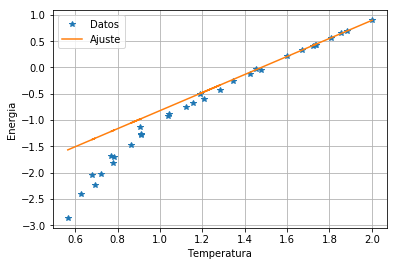

In [58]:
x = temperatures[::len(DENSITIES)]
x = x[temperatures[::len(DENSITIES)] > 1.5]

y = energies[::len(DENSITIES)]
y = y[temperatures[::len(DENSITIES)] > 1.5]

m, b = linear(x, y)
print(f'{m[0]:.2f} \pm {m[1]:.2f}')

plt.plot(temperatures[::len(DENSITIES)], energies[::len(DENSITIES)], '*', label='Datos')
plt.plot(temperatures[::len(DENSITIES)], m[0] * temperatures[::len(DENSITIES)] + b[0], label='Ajuste')
plt.grid()
plt.xlabel('Temperatura')
plt.ylabel('Energia')
savefig('e_vs_t_rho_0.png')
plt.legend()
plt.show()

## g(r)

In [19]:
def read_dat(fname):
    return pd.read_csv(os.path.expanduser(f'../data/{fname}'), names=['r', 'a', 'b'], sep=' ')

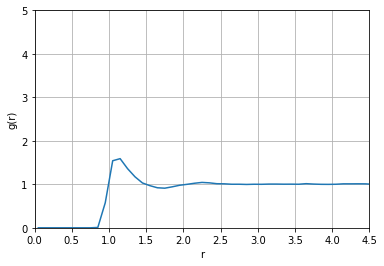

In [29]:
df = read_dat('gas.dat')

plt.plot(df.r, df.a)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid()
plt.xlim(0, 4.5)
plt.ylim(0, 5)
savefig('gas.png')

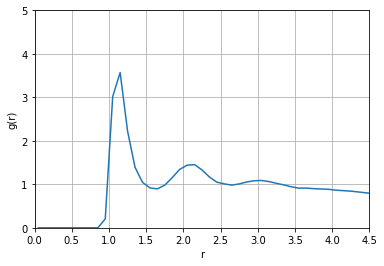

In [30]:
df = read_dat('liquido.dat')

plt.plot(df.r, df.a)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid()
plt.ylim(0, 5)
plt.xlim(0, 4.5)
savefig('liquido.png')

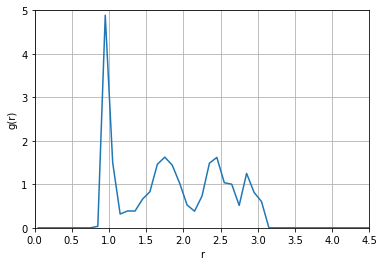

In [31]:
df = read_dat('solido.dat')

plt.plot(df.r, df.a)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid()
plt.ylim(0, 5)
plt.xlim(0, 4.5)
savefig('solido.png')

## Presion

In [59]:
TEMPERATURES = np.arange(0.4, 2.0, 0.05)[::2]
DENSITIES = np.arange(0.4, 0.8, 0.02)[::2]
temperatures = []
pressures = []
rhos = []
for temp in TEMPERATURES:
    for rho in DENSITIES:
        df = read_log(f'temp_t_{temp:.2f}_rho_{rho:.2f}.log')
        rhos.append(df.rho.mean())
        temperatures.append(df['T'].mean())
        pressures.append(df.P.mean())
temperatures = np.array(temperatures)
pressures = np.array(pressures)

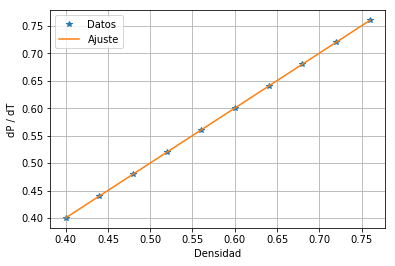

In [62]:
ms = []
for i, rho in enumerate(DENSITIES):
    x = temperatures[i::len(DENSITIES)]
    x = x[temperatures[i::len(DENSITIES)] > 1.5]

    y = pressures[i::len(DENSITIES)]
    y = y[temperatures[i::len(DENSITIES)] > 1.5]

    m, b = linear(x, y)
    ms.append(m[0])
#     print(f'{m[0]:.5f} \pm {m[1]:.5f}, rho = {rho}')

#     plt.plot(temperatures[i::len(DENSITIES)], pressures[i::len(DENSITIES)], '*', label='Datos')
#     plt.plot(temperatures[i::len(DENSITIES)], m[0] * temperatures[i::len(DENSITIES)] + b[0], label='Ajuste')

m, b = linear(DENSITIES, ms)
plt.plot(DENSITIES, ms, '*', label='Datos')
plt.plot(DENSITIES, m[0] * DENSITIES + b[0], '-', label='Ajuste')
plt.grid()
plt.xlabel('Densidad')
plt.ylabel('dP / dT')
plt.legend()
savefig('pendientes_vs_rhos.png')
plt.show()

0.76038 \pm 0.00001, rho = 0.7600000000000003


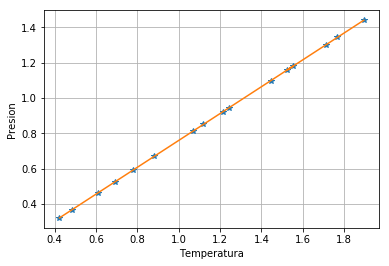

In [63]:
x = temperatures[i::len(DENSITIES)]
x = x[temperatures[i::len(DENSITIES)] > 1.5]

y = pressures[i::len(DENSITIES)]
y = y[temperatures[i::len(DENSITIES)] > 1.5]

m, b = linear(x, y)
ms.append(m[0])
print(f'{m[0]:.5f} \pm {m[1]:.5f}, rho = {rho}')

plt.plot(temperatures[i::len(DENSITIES)], pressures[i::len(DENSITIES)], '*', label='Datos')
plt.plot(temperatures[i::len(DENSITIES)], m[0] * temperatures[i::len(DENSITIES)] + b[0], label='Ajuste')
plt.grid()
plt.xlabel('Temperatura')
plt.ylabel('Presion')
savefig('presion_vs_t.png')
plt.show()